In [13]:
import pandas as pd
import numpy as np
import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('fashion', kind='train')
X_test, y_test = load_mnist('fashion', kind='t10k')

X_train.shape
y_train.shape

(60000,)

In [5]:
X_train,X_validation, y_train,y_validation = train_test_split(X_train,y_train,test_size=0.15)

In [8]:
clf1 = MLPClassifier(random_state=1, max_iter=1,verbose=True,
                    hidden_layer_sizes=(256,32),batch_size=600,learning_rate='constant',
                    learning_rate_init=0.001,tol=1e-4,
                    activation='relu')

Iteration 1, loss = 3.39149334
Iteration 2, loss = 1.80185750
Iteration 3, loss = 1.60937758
Iteration 4, loss = 1.52637133
Iteration 5, loss = 1.47632376
Iteration 6, loss = 1.44384926
Iteration 7, loss = 1.41405483
Iteration 8, loss = 1.38738302
Iteration 9, loss = 1.37089921
Iteration 10, loss = 1.27786846
Iteration 11, loss = 1.20051939
Iteration 12, loss = 1.15088613
Iteration 13, loss = 1.03559318
Iteration 14, loss = 0.94447109
Iteration 15, loss = 0.85595783
Iteration 16, loss = 0.80748633
Iteration 17, loss = 0.75517131
Iteration 18, loss = 0.70702948
Iteration 19, loss = 0.67380124
Iteration 20, loss = 0.63847524
Iteration 21, loss = 0.60484436
Iteration 22, loss = 0.59964620
Iteration 23, loss = 0.59605223
Iteration 24, loss = 0.56404161
Iteration 25, loss = 0.51841584
Iteration 26, loss = 0.49769092
Iteration 27, loss = 0.48746116
Iteration 28, loss = 0.46051245
Iteration 29, loss = 0.43918617
Iteration 30, loss = 0.42801415
Iteration 31, loss = 0.42153687
Iteration 32, los

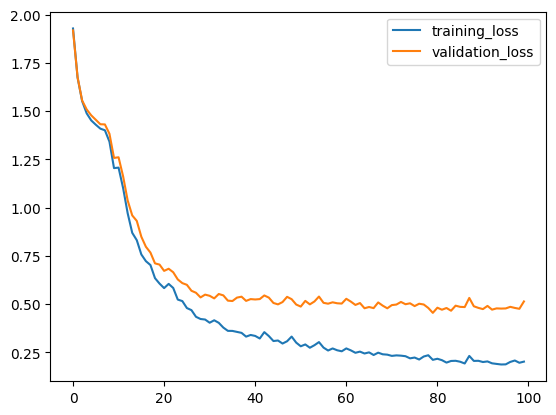

In [9]:
training_loss=[]
validation_loss=[]
for i in range(100):
    clf1.partial_fit(X_train,y_train,classes = np.unique(y_train))
    train_proba = clf1.predict_proba(X_train)
    training_loss.append(log_loss(y_train,train_proba))
    probabilities = clf1.predict_proba(X_validation)
    validation_loss.append(log_loss(y_validation,probabilities))
    # print(training_loss)
    # print(validation_loss)
plt.plot(training_loss,label='training_loss')
plt.plot(validation_loss,label='validation_loss')
plt.legend()
plt.show()


In [7]:
clf2 = MLPClassifier(random_state=1, max_iter=1,verbose=True,
                    hidden_layer_sizes=(256,32),batch_size=600,learning_rate='constant',
                    learning_rate_init=0.001,tol=1e-4,
                    activation='tanh')

Iteration 1, loss = 0.94264785
Iteration 2, loss = 0.66219447
Iteration 3, loss = 0.63043243
Iteration 4, loss = 0.62048076
Iteration 5, loss = 0.62341433
Iteration 6, loss = 0.60710819
Iteration 7, loss = 0.62935615
Iteration 8, loss = 0.62138832
Iteration 9, loss = 0.62187880
Iteration 10, loss = 0.63198252
Iteration 11, loss = 0.61118663
Iteration 12, loss = 0.61008265
Iteration 13, loss = 0.59197609
Iteration 14, loss = 0.61545124
Iteration 15, loss = 0.61773380
Iteration 16, loss = 0.60313525
Iteration 17, loss = 0.60506990
Iteration 18, loss = 0.61024870
Iteration 19, loss = 0.58893815
Iteration 20, loss = 0.58763956
Iteration 21, loss = 0.58407504
Iteration 22, loss = 0.57564526
Iteration 23, loss = 0.56970203
Iteration 24, loss = 0.57295414
Iteration 25, loss = 0.57708768
Iteration 26, loss = 0.58471344
Iteration 27, loss = 0.56214839
Iteration 28, loss = 0.57571652
Iteration 29, loss = 0.57273665
Iteration 30, loss = 0.55696037
Iteration 31, loss = 0.54839826
Iteration 32, los

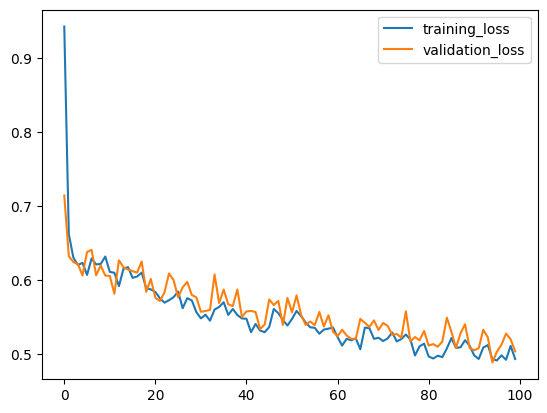

In [8]:
training_loss=[]
validation_loss=[]
for i in range(100):
    clf2.partial_fit(X_train,y_train,classes = np.unique(y_train))
    training_loss.append(clf2.loss_)
    probabilities = clf2.predict_proba(X_validation)
    validation_loss.append(log_loss(y_validation,probabilities))
    # print(training_loss)
    # print(validation_loss)
plt.plot(training_loss,label='training_loss')
plt.plot(validation_loss,label='validation_loss')
plt.legend()
plt.show()


In [11]:
clf3 = MLPClassifier(random_state=1, max_iter=1,verbose=True,
                    hidden_layer_sizes=(256,32),batch_size=600,learning_rate='constant',
                    learning_rate_init=0.001,tol=1e-4,
                    activation='logistic')

In [14]:
pred = clf3.predict(X_test)
accuracy_score(y_test,pred)

0.8277

Iteration 1, loss = 1.63826582
Iteration 2, loss = 0.96335934
Iteration 3, loss = 0.73750802
Iteration 4, loss = 0.65422347
Iteration 5, loss = 0.60615433
Iteration 6, loss = 0.58031159
Iteration 7, loss = 0.55587998
Iteration 8, loss = 0.55165122
Iteration 9, loss = 0.54026037
Iteration 10, loss = 0.53825739
Iteration 11, loss = 0.52216245
Iteration 12, loss = 0.52335075
Iteration 13, loss = 0.51494812
Iteration 14, loss = 0.50814378
Iteration 15, loss = 0.51383317
Iteration 16, loss = 0.51903891
Iteration 17, loss = 0.51118207
Iteration 18, loss = 0.50401697
Iteration 19, loss = 0.48575289
Iteration 20, loss = 0.48763796
Iteration 21, loss = 0.49129737
Iteration 22, loss = 0.50323368
Iteration 23, loss = 0.48707978
Iteration 24, loss = 0.49501363
Iteration 25, loss = 0.51031174
Iteration 26, loss = 0.48890043
Iteration 27, loss = 0.48622422
Iteration 28, loss = 0.48139764
Iteration 29, loss = 0.51166862
Iteration 30, loss = 0.49446146
Iteration 31, loss = 0.50702959
Iteration 32, los

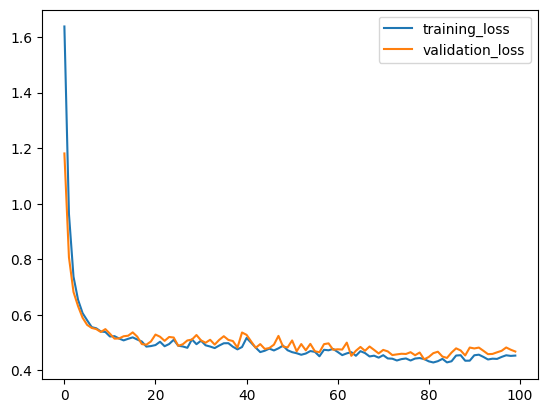

In [12]:
training_loss=[]
validation_loss=[]
for i in range(100):
    clf3.partial_fit(X_train,y_train,classes = np.unique(y_train))
    training_loss.append(clf3.loss_)
    probabilities = clf3.predict_proba(X_validation)
    validation_loss.append(log_loss(y_validation,probabilities))
    # print(training_loss)
    # print(validation_loss)
plt.plot(training_loss,label='training_loss')
plt.plot(validation_loss,label='validation_loss')
plt.legend()
plt.show()


In [14]:
clf4 = MLPClassifier(random_state=1, max_iter=1,verbose=True,
                    hidden_layer_sizes=(256,32),batch_size=600,learning_rate='constant',
                    learning_rate_init=0.001,tol=1e-4,
                    activation='identity')

Iteration 1, loss = 10.12257354
Iteration 2, loss = 6.02963791
Iteration 3, loss = 5.90365420
Iteration 4, loss = 5.35409950
Iteration 5, loss = 5.06515266
Iteration 6, loss = 4.65868804
Iteration 7, loss = 4.25206894
Iteration 8, loss = 3.76744259
Iteration 9, loss = 3.74680947
Iteration 10, loss = 3.23284800
Iteration 11, loss = 2.86607027
Iteration 12, loss = 2.95421675
Iteration 13, loss = 2.38651338
Iteration 14, loss = 1.94113776
Iteration 15, loss = 1.80834624
Iteration 16, loss = 2.19580605
Iteration 17, loss = 1.96828191
Iteration 18, loss = 1.69432395
Iteration 19, loss = 1.58849988
Iteration 20, loss = 1.46796343
Iteration 21, loss = 1.27946045
Iteration 22, loss = 1.30827343
Iteration 23, loss = 1.01874031
Iteration 24, loss = 1.02779478
Iteration 25, loss = 1.01130632
Iteration 26, loss = 1.03423335
Iteration 27, loss = 1.00218898
Iteration 28, loss = 0.93709346
Iteration 29, loss = 0.89324134
Iteration 30, loss = 0.85619706
Iteration 31, loss = 0.78808471
Iteration 32, lo

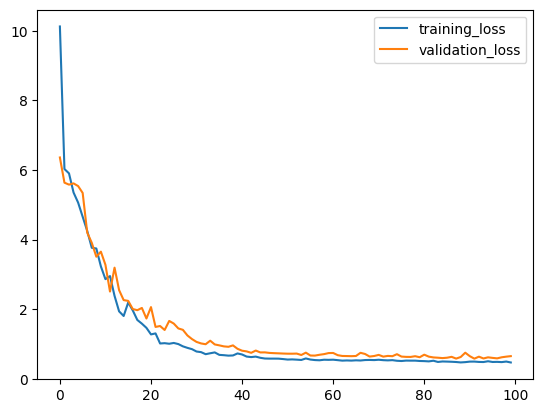

In [15]:
training_loss=[]
validation_loss=[]
for i in range(100):
    clf4.partial_fit(X_train,y_train,classes = np.unique(y_train))
    training_loss.append(clf4.loss_)
    probabilities = clf4.predict_proba(X_validation)
    validation_loss.append(log_loss(y_validation,probabilities))
    # print(training_loss)
    # print(validation_loss)
plt.plot(training_loss,label='training_loss')
plt.plot(validation_loss,label='validation_loss')
plt.legend()
plt.show()


In [5]:
def train_and_plot(learning_rate,activation,layer_sizes):
    clf = MLPClassifier(random_state=1, max_iter=1,verbose=True,
                    hidden_layer_sizes=layer_sizes,batch_size=600,learning_rate='constant',
                    learning_rate_init=learning_rate,tol=1e-4,
                    activation=activation)
    training_loss=[]
    validation_loss=[]
    for i in range(100):
        clf.partial_fit(X_train,y_train,classes = np.unique(y_train))
        training_loss.append(clf.loss_)
        probabilities = clf.predict_proba(X_validation)
        validation_loss.append(log_loss(y_validation,probabilities))
    # print(training_loss)
    # print(validation_loss)
    plt.plot(training_loss,label='training_loss')
    plt.plot(validation_loss,label='validation_loss')
    plt.legend()
    plt.title('Model with learning rate :'+str(learning_rate))
    plt.show()


Iteration 1, loss = 2.34480614
Iteration 2, loss = 2.32301442
Iteration 3, loss = 2.32484035
Iteration 4, loss = 2.32495739
Iteration 5, loss = 2.32484708
Iteration 6, loss = 2.32462329
Iteration 7, loss = 2.32435867
Iteration 8, loss = 2.32409179
Iteration 9, loss = 2.32383986
Iteration 10, loss = 2.32360911
Iteration 11, loss = 2.32340055
Iteration 12, loss = 2.32321294
Iteration 13, loss = 2.32304430
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 14, loss = 2.32289253
Iteration 15, loss = 2.32275572
Iteration 16, loss = 2.32263218
Iteration 17, loss = 2.32252047
Iteration 18, loss = 2.32241936
Iteration 19, loss = 2.32232777
Iteration 20, loss = 2.32224476
Iteration 21, loss = 2.32216950
Iteration 22, loss = 2.32210127
Iteration 23, loss = 2.33506609
Iteration 24, loss = 2.33434262
Iteration 25, loss = 2.34696346
Iteration 26, loss = 2.33722761
Iteration 27, loss = 2.32808527
Iteration 28, loss = 2.32568835
Iteration 29, loss = 2.

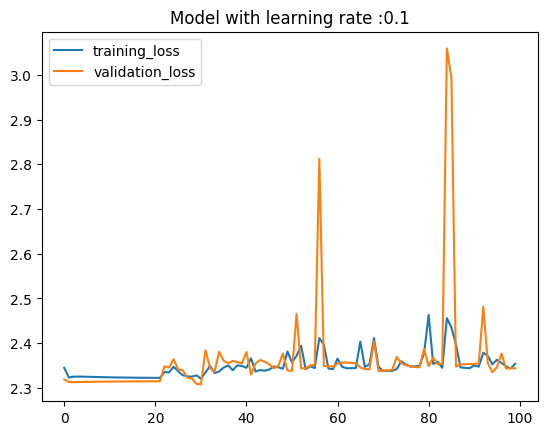

Iteration 1, loss = 1.18671948
Iteration 2, loss = 0.85562307
Iteration 3, loss = 0.90430753
Iteration 4, loss = 0.86318505
Iteration 5, loss = 0.88494024
Iteration 6, loss = 0.89253112
Iteration 7, loss = 0.88461818
Iteration 8, loss = 0.83791239
Iteration 9, loss = 0.82163732
Iteration 10, loss = 0.80597204
Iteration 11, loss = 0.82404012
Iteration 12, loss = 0.79783321
Iteration 13, loss = 0.87069746
Iteration 14, loss = 0.84421564
Iteration 15, loss = 0.77545186
Iteration 16, loss = 0.82392186
Iteration 17, loss = 0.84787805
Iteration 18, loss = 0.80924165
Iteration 19, loss = 0.85665118
Iteration 20, loss = 0.82775266
Iteration 21, loss = 0.81460023
Iteration 22, loss = 0.80240080
Iteration 23, loss = 0.80062573
Iteration 24, loss = 0.75214641
Iteration 25, loss = 0.75052195
Iteration 26, loss = 0.75376614
Iteration 27, loss = 0.74212808
Iteration 28, loss = 0.78255795
Iteration 29, loss = 0.76765862
Iteration 30, loss = 0.83671133
Iteration 31, loss = 0.81172177
Iteration 32, los

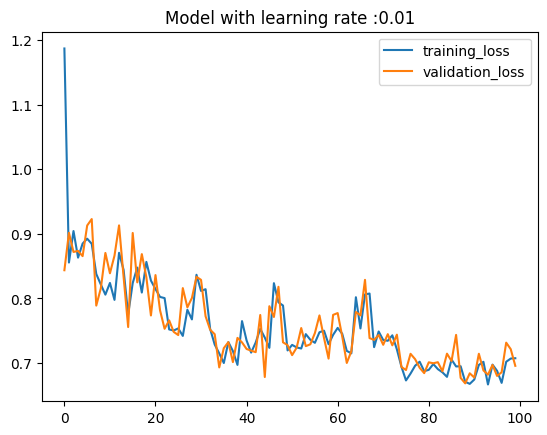

Iteration 1, loss = 1.63826582
Iteration 2, loss = 0.96335934
Iteration 3, loss = 0.73750802
Iteration 4, loss = 0.65422347
Iteration 5, loss = 0.60615433
Iteration 6, loss = 0.58031159
Iteration 7, loss = 0.55587998
Iteration 8, loss = 0.55165122
Iteration 9, loss = 0.54026037
Iteration 10, loss = 0.53825739
Iteration 11, loss = 0.52216245
Iteration 12, loss = 0.52335075
Iteration 13, loss = 0.51494812
Iteration 14, loss = 0.50814378
Iteration 15, loss = 0.51383317
Iteration 16, loss = 0.51903891
Iteration 17, loss = 0.51118207
Iteration 18, loss = 0.50401697
Iteration 19, loss = 0.48575289
Iteration 20, loss = 0.48763796
Iteration 21, loss = 0.49129737
Iteration 22, loss = 0.50323368
Iteration 23, loss = 0.48707978
Iteration 24, loss = 0.49501363
Iteration 25, loss = 0.51031174
Iteration 26, loss = 0.48890043
Iteration 27, loss = 0.48622422
Iteration 28, loss = 0.48139764
Iteration 29, loss = 0.51166862
Iteration 30, loss = 0.49446146
Iteration 31, loss = 0.50702959
Iteration 32, los

In [6]:
train_and_plot(0.1,'logistic',(256,32))
train_and_plot(0.01,'logistic',(256,32))
train_and_plot(0.001,'logistic',(256,32))


Iteration 1, loss = 1.78642259
Iteration 2, loss = 1.18914896
Iteration 3, loss = 0.89207530
Iteration 4, loss = 0.74503468
Iteration 5, loss = 0.68114702
Iteration 6, loss = 0.62920857
Iteration 7, loss = 0.59584468
Iteration 8, loss = 0.57551186
Iteration 9, loss = 0.56373417
Iteration 10, loss = 0.55287014
Iteration 11, loss = 0.55557814
Iteration 12, loss = 0.54939482
Iteration 13, loss = 0.54311058
Iteration 14, loss = 0.53620483
Iteration 15, loss = 0.53357667
Iteration 16, loss = 0.54185265
Iteration 17, loss = 0.52882963
Iteration 18, loss = 0.53449518
Iteration 19, loss = 0.51188151
Iteration 20, loss = 0.52337982
Iteration 21, loss = 0.50388687
Iteration 22, loss = 0.49928361
Iteration 23, loss = 0.51090645
Iteration 24, loss = 0.50554937
Iteration 25, loss = 0.49728257
Iteration 26, loss = 0.49688607
Iteration 27, loss = 0.49274864
Iteration 28, loss = 0.49140459
Iteration 29, loss = 0.49838497
Iteration 30, loss = 0.49278422
Iteration 31, loss = 0.49200394
Iteration 32, los

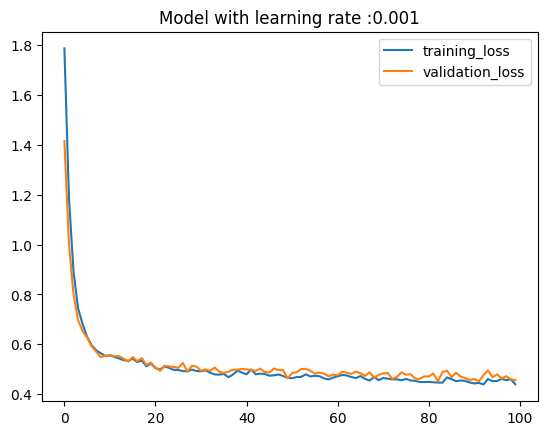

Iteration 1, loss = 1.97005289
Iteration 2, loss = 1.38676279
Iteration 3, loss = 1.01063204
Iteration 4, loss = 0.80909539
Iteration 5, loss = 0.70383323
Iteration 6, loss = 0.65987144
Iteration 7, loss = 0.62214151
Iteration 8, loss = 0.60263305
Iteration 9, loss = 0.58223114
Iteration 10, loss = 0.56264604
Iteration 11, loss = 0.54652604
Iteration 12, loss = 0.53853654
Iteration 13, loss = 0.54112192
Iteration 14, loss = 0.54415521
Iteration 15, loss = 0.53178015
Iteration 16, loss = 0.52723388
Iteration 17, loss = 0.52443981
Iteration 18, loss = 0.52275952
Iteration 19, loss = 0.51992898
Iteration 20, loss = 0.51496273
Iteration 21, loss = 0.51037115
Iteration 22, loss = 0.50511124
Iteration 23, loss = 0.51548425
Iteration 24, loss = 0.53317144
Iteration 25, loss = 0.51173540
Iteration 26, loss = 0.51311966
Iteration 27, loss = 0.50517728
Iteration 28, loss = 0.50941252
Iteration 29, loss = 0.50636565
Iteration 30, loss = 0.50475743
Iteration 31, loss = 0.51823707
Iteration 32, los

Iteration 1, loss = 1.84135227
Iteration 2, loss = 1.38214574
Iteration 3, loss = 1.13287886
Iteration 4, loss = 0.97118217
Iteration 5, loss = 0.84654666
Iteration 6, loss = 0.76461207
Iteration 7, loss = 0.70627033
Iteration 8, loss = 0.66379148
Iteration 9, loss = 0.62479604
Iteration 10, loss = 0.61266535
Iteration 11, loss = 0.60766740
Iteration 12, loss = 0.58605332
Iteration 13, loss = 0.57632737
Iteration 14, loss = 0.56901081
Iteration 15, loss = 0.57178827
Iteration 16, loss = 0.55148499
Iteration 17, loss = 0.55276361
Iteration 18, loss = 0.55254953
Iteration 19, loss = 0.53224216
Iteration 20, loss = 0.53821781
Iteration 21, loss = 0.53468533
Iteration 22, loss = 0.53536921
Iteration 23, loss = 0.52315616
Iteration 24, loss = 0.52357631
Iteration 25, loss = 0.51393770
Iteration 26, loss = 0.51987602
Iteration 27, loss = 0.51453875
Iteration 28, loss = 0.50994082
Iteration 29, loss = 0.50096685
Iteration 30, loss = 0.49999085
Iteration 31, loss = 0.50025733
Iteration 32, los

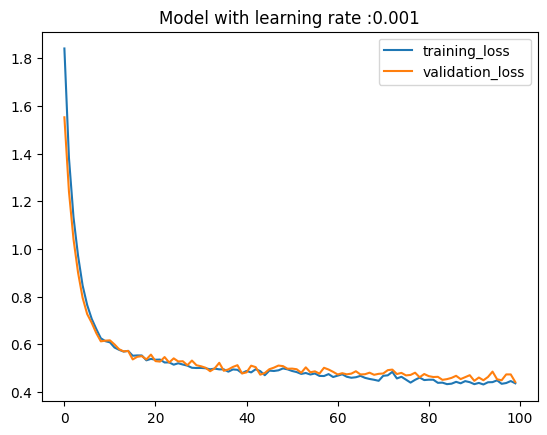

Iteration 1, loss = 2.01334017
Iteration 2, loss = 1.72816679
Iteration 3, loss = 1.52339135
Iteration 4, loss = 1.35795983
Iteration 5, loss = 1.23390194
Iteration 6, loss = 1.13903347
Iteration 7, loss = 1.05799876
Iteration 8, loss = 0.99493353
Iteration 9, loss = 0.93400784
Iteration 10, loss = 0.88493795
Iteration 11, loss = 0.83973882
Iteration 12, loss = 0.80992763
Iteration 13, loss = 0.77978141
Iteration 14, loss = 0.75996490
Iteration 15, loss = 0.72308764
Iteration 16, loss = 0.71297912
Iteration 17, loss = 0.70006044
Iteration 18, loss = 0.68574689
Iteration 19, loss = 0.66954836
Iteration 20, loss = 0.65764677
Iteration 21, loss = 0.65167433
Iteration 22, loss = 0.63442902
Iteration 23, loss = 0.61944641
Iteration 24, loss = 0.61576925
Iteration 25, loss = 0.59984009
Iteration 26, loss = 0.60264260
Iteration 27, loss = 0.59121983
Iteration 28, loss = 0.58989819
Iteration 29, loss = 0.58346433
Iteration 30, loss = 0.58567694
Iteration 31, loss = 0.58909695
Iteration 32, los

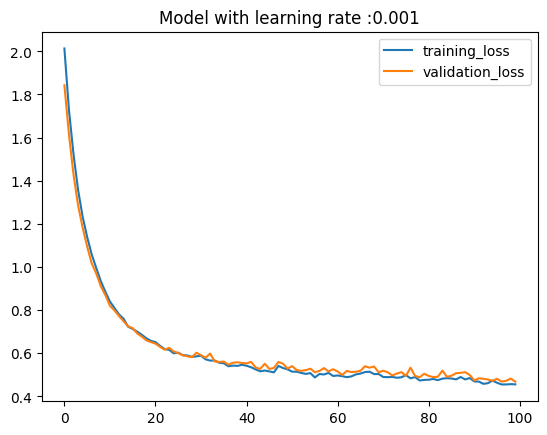

In [7]:
train_and_plot(0.001,'logistic',(128,32))
train_and_plot(0.001,'logistic',(64,32))
train_and_plot(0.001,'logistic',(256,16))
train_and_plot(0.001,'logistic',(256,8))

In [6]:
parameters={'hidden_layer_sizes':[(256,32),(128,64,32),(256,64,16)],
            'learning_rate_init':[1e-3,1e-4],
            'activation':['logistic','relu']
            }
mlp = MLPClassifier(verbose=True,
            batch_size=600,learning_rate='constant',max_iter=250,
            early_stopping=True,validation_fraction=0.15)
gridsearch = GridSearchCV(mlp,parameters,n_jobs= -1)
gridsearch.fit(X_train,y_train)



Iteration 1, loss = 3.72630669
Validation score: 0.102745
Iteration 2, loss = 2.34144386
Validation score: 0.102745
Iteration 3, loss = 2.33051982
Validation score: 0.095425
Iteration 4, loss = 2.32224150
Validation score: 0.095556
Iteration 5, loss = 2.29326121
Validation score: 0.178170
Iteration 6, loss = 2.11088809
Validation score: 0.178301
Iteration 7, loss = 2.09023158
Validation score: 0.185098
Iteration 8, loss = 2.07572816
Validation score: 0.184444
Iteration 9, loss = 2.06370479
Validation score: 0.184444
Iteration 10, loss = 2.05594103
Validation score: 0.186275
Iteration 11, loss = 2.05343472
Validation score: 0.180392
Iteration 12, loss = 2.05278579
Validation score: 0.188105
Iteration 13, loss = 2.04354538
Validation score: 0.192157
Iteration 14, loss = 2.03923149
Validation score: 0.194118
Iteration 15, loss = 2.03543369
Validation score: 0.192157
Iteration 16, loss = 2.03338015
Validation score: 0.191634
Iteration 17, loss = 2.02755857
Validation score: 0.195163
Iterat

GridSearchCV(estimator=MLPClassifier(batch_size=600, early_stopping=True,
                                     max_iter=250, validation_fraction=0.15,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(256, 32), (128, 64, 32),
                                                (256, 64, 16)],
                         'learning_rate_init': [0.001, 0.0001]})

In [12]:
gridsearch.best_params_
# df = pd.DataFrame(gridsearch.cv_results_)
# df


{'activation': 'relu',
 'hidden_layer_sizes': (256, 64, 16),
 'learning_rate_init': 0.001}

In [14]:
f = open('gridsearch.pkl','wb')
pickle.dump(gridsearch,f)


In [15]:
f = open('gridsearch.pkl','rb')
loadedgrid = pickle.load(f)


In [16]:
loadedgrid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (256, 64, 16),
 'learning_rate_init': 0.001}